# Implementation without SKLearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('../Datasets/air-quality-prediction/Train.csv').values
x = data[:,:5]
X = np.zeros((x.shape[0],x.shape[1]+1))
for i in range(x.shape[0]):
    X[i] = np.insert(x[i],0,1)
y = data[:,-1]
print(X[0])
print(y[0])

[ 1.          0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
-82.1546665556


In [22]:
def hypotheses(x,theta):
    return np.dot(theta,x)

def error(X,Y,theta):
    err = 0
    for i in range(X.shape[0]):
        err += (hypotheses(X[i],theta)-Y[i])**2
    return err

def gradient(X,Y,theta):
    grad = np.zeros((X.shape[1],))
    for i in range(X.shape[0]):
        grad += (hypotheses(X[i],theta)-Y[i])*X[i]
    return grad
    
def gradientDescent(X,Y,maxItr=100,learningRate=0.01):
    theta = np.zeros((X.shape[1],))
    error_list = []
    while maxItr:
        error_list.append(error(X,Y,theta))
        theta -= learningRate*gradient(X,Y,theta)
        maxItr -= 1
    return theta,error_list

In [15]:
theta,error_list = gradientDescent(X,y,maxItr=1000,learningRate=0.0001)

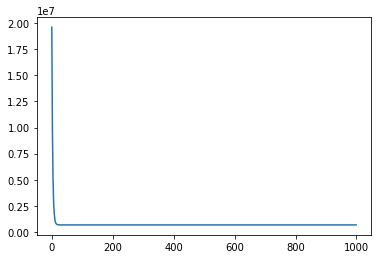

In [16]:
plt.plot(error_list)
plt.show()

In [30]:
data = pd.read_csv('../Datasets/air-quality-prediction/Test.csv').values
xT = data[:,:5]
XT = np.zeros((xT.shape[0],xT.shape[1]+1))
for i in range(xT.shape[0]):
    XT[i] = np.insert(xT[i],0,1)
yT = data[:,-1]
yHyp = np.zeros((yT.shape[0],))
for i in range(XT.shape[0]):
    yHyp[i] = hypotheses(XT[i],theta)
err = error(XT,yT,theta)
print(err/XT.shape[0])

400.91751474
